<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-of-literary-genres" data-toc-modified-id="Classification-of-literary-genres-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification of literary genres</a></span><ul class="toc-item"><li><span><a href="#todo" data-toc-modified-id="todo-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>todo</a></span></li></ul></li><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the data</a></span><ul class="toc-item"><li><span><a href="#Genre-distribution" data-toc-modified-id="Genre-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Genre distribution</a></span></li></ul></li><li><span><a href="#Hyperparameter-optimization" data-toc-modified-id="Hyperparameter-optimization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hyperparameter optimization</a></span><ul class="toc-item"><li><span><a href="#SVM" data-toc-modified-id="SVM-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#SGDClassifier-as-logistic-regression" data-toc-modified-id="SGDClassifier-as-logistic-regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>SGDClassifier as logistic regression</a></span></li><li><span><a href="#SGDClassifier-as-linear-svm" data-toc-modified-id="SGDClassifier-as-linear-svm-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>SGDClassifier as linear svm</a></span></li><li><span><a href="#SGDClassifier-other" data-toc-modified-id="SGDClassifier-other-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>SGDClassifier other</a></span></li><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Perceptron</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Crossvalidation" data-toc-modified-id="Crossvalidation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Crossvalidation</a></span><ul class="toc-item"><li><span><a href="#Traditional-approaches:-Logistic-regression-and-svm" data-toc-modified-id="Traditional-approaches:-Logistic-regression-and-svm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Traditional approaches: Logistic regression and svm</a></span></li><li><span><a href="#Recent-approaches:-XGBoost,-LightGBM,-Catboost" data-toc-modified-id="Recent-approaches:-XGBoost,-LightGBM,-Catboost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Recent approaches: XGBoost, LightGBM, Catboost</a></span><ul class="toc-item"><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Catboost</a></span></li></ul></li></ul></li><li><span><a href="#Analysis-of-results" data-toc-modified-id="Analysis-of-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis of results</a></span></li><li><span><a href="#Separating-stricly-between-authors,-series-and-publishers" data-toc-modified-id="Separating-stricly-between-authors,-series-and-publishers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Separating stricly between authors, series and publishers</a></span></li><li><span><a href="#using-word2vec" data-toc-modified-id="using-word2vec-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>using word2vec</a></span></li><li><span><a href="#Testing-dask" data-toc-modified-id="Testing-dask-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testing dask</a></span></li></ul></div>

# Classification of literary genres  

## todo
* use hyperopt for the hyperparameter opimization for lgb, xgb, catgb
* make lgb, xgb, catgb use the gpu
* calculate correlation between specific features like authorship or personal pronouns or names with genre


In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import random
import numpy as np
from collections import Counter, defaultdict
import re
import time
import json

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import optuna

from constrain import get_constrained_data, get_available_combinations #our util modul

In [2]:
class Report(defaultdict):
    def __init__(self, parameter):
        super().__init__()
        self.parameter = parameter
        self.t = time.localtime()
        self.parameter['timestamp'] = f"{self.t.tm_mday}.{self.t.tm_mon}.{self.t.tm_year} - {self.t.tm_hour}:{self.t.tm_min}:{self.t.tm_sec}" 

    def report(self):
        print(f"parameter: {self.parameter}")
        for classifier, performance in self.items():
            print(f"{classifier:20}: \t{performance}")
            
    def __repr__(self):
        return f"parameter: {self.parameter}    \nvalues: {[(x[0],x[1]) for x in self.items()]}"

    def to_file(self):
        filename = f"report_{self.t.tm_year}{self.t.tm_mon}{self.t.tm_mday}_{self.t.tm_hour}-{self.t.tm_min}.txt"
        with open(filename, 'w', encoding='utf-8') as fout:
            #write metadata
            for k,v in self.parameter.items():
                fout.write(f"{k}={v}\n")
            fout.write('#######\n')
            #write results
            fout.write("name;runtime;eval_metric;score_mean;score_std\n")
            for k,v in self.items():
                fout.write(f"{v}\n")
        print(f'results written to file {filename}')
        

def report(name, measure, scores, runtime):
    """
    report ml results
    """
    print(f"{name} ({runtime}s): {measure} {scores.mean():0.2f} +/-{scores.std() * 2:0.2f}")
    return (f'"{name}";{runtime};"{measure}";{scores.mean():0.3f};{scores.std():0.2f}')
    
    
    
def sample_texts_in_genres(df, sample_size):
    """
    sample sample_size texts from each genre and build a new dateframe 
    """
    buffer = [] 
    genre_names = set(list(df.genre.values))
    for genre in genre_names:
        if len(df[df.genre==genre]) > sample_size:
            buffer.append(df[df.genre==genre].sample(sample_size, random_state=33))
        else:
            buffer.append(df[df.genre==genre])
    return pd.concat(buffer)


def format_data(X, tfidf=False, pca_components=0, scaling=True):
    """
    handles dependencies between dimensionality reduction and tfidf (if tfidf, pca doesn't work)
    """
    if tfidf:
        X = TfidfTransformer().fit_transform(X)
        
    if scaling == True:
            max_abs_scaler = MaxAbsScaler()
            X = max_abs_scaler.fit_transform(X)
   
    if pca_components > 0:
        if tfidf:  #because pca doesn't work with sparse matrices
            lsi = TruncatedSVD(n_components=pca_components)
            X = lsi.fit_transform(X)
            print("Variance explained by LSI components: ", round(lsi.explained_variance_ratio_.sum(), 2))
            
        else:
            pca = PCA(n_components=pca_components)
            X = pca.fit_transform(X)
            print("Variance explained by PCA components: ", round(pca.explained_variance_ratio_.sum(), 2))
    return X


def plot_trials(df):
    plt.xlabel('Seq. of trials')
    plt.ylabel('1-f1 score')
    plt.plot(df.number, df.value);    


def reduce_features(df, nr_features):
    """
    reduces number of tokens in df to n most frequent tokens
    """
    df.head()
    df['sum']=df_doc_term_.sum(axis=1)
    df_sorted_ = df.sort_values(by=['sum'], ascending=False)
    df_sorted = df_sorted_.drop(['sum'], axis='columns')
    df_sorted_mfw = df_sorted.iloc[:nr_features,:]
    print(df_sorted_mfw.shape)
    return df_sorted_mfw


def stopwords(df, stopwords):
    """
    remove stopwords from doc term matrix
    """
    remove_words = []
    for w in stopwords:
        if w in df.index:
            remove_words.append(w)
    print(f"{len(stopwords)} stopwords. {len(remove_words)} words removed")
    return df.drop(remove_words, axis=0)


def run_combinations(dtm, combinations, classifier, sample_file):
    """
    uses different combinations of creating the training and test set: just random, different
    publishers, series, authors and all together (strict) in training and test set.
    """
    result = []
    for combination in combinations:

        genre = combination[0]
        case = combination[1]

        X_train, X_test, y_train, y_test =  get_constrained_data(genre=genre, 
                                                                 case=case,
                                                                 sample_file=sample_file, 
                                                                 df=dtm)
        #print(X_train.shape)
        #print(y_train.shape)        
        #print(y_train)
        #print(y_test)

        classifier.fit(X_train,y_train)
        res = classifier.score(X_test,y_test)

        result.append([genre,case,res])
    
    return result



# Prepare the data

In [3]:
#parameter for the data. Adjust here 
number_of_samples = 500    #number of text per genre (undersampling, if not enough texts)
features = 2000             #number of features either tokens or in case of dim_reduction = True dimensions of pca or lsi, 0=no dimensionality reductions     
dim_reduction = False
remove_stopwords = True
stop_words_file = 'stopwords_de.txt'

In [4]:
#computer = Path(r'c:\users\fotis')
computer = Path(r'd:\mydata')
dtm_file_dir = computer / r"Dropbox\romangeschichte-dnb\dhd20"
dtm_file = dtm_file_dir / 'dtm_dhd20_relative.tsv'      #'dtm_dhd20_relative'  

In [5]:
#preparing  metadata file, sampling files
#meta = pd.read_csv?
meta = pd.read_csv(dtm_file_dir / 'labels.tsv', 
                   names=['genre', 'genre_num'], 
                   header=0, 
                   index_col=0, 
                   sep='\t',
                   skiprows=0,
                   low_memory=False)
print(meta.shape)
meta.head()

(11684, 2)


,genre,genre_num
9783732517169,Erotik,0
9783732532728,Liebes,1
EMS9700120068256,Heimat,2
EMS9700120075025,Heimat,2
EMS9700120090424,Heimat,2


## Genre distribution

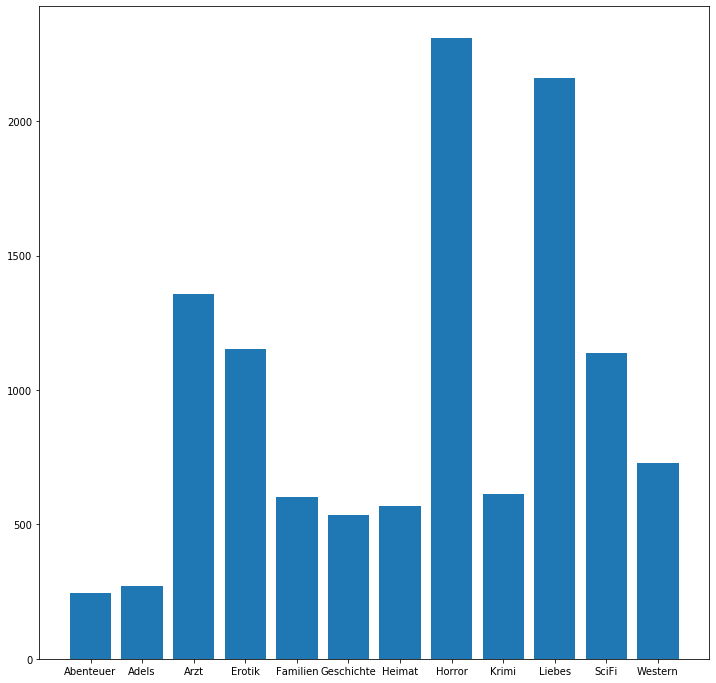

In [75]:
genres = []
y = []
labels = Counter(meta.genre)
x = [i for i in range(len(set(labels.keys())))]
for genre, count in sorted(labels.items()):
    genres.append(genre)
    y.append(count)
plt.figure(figsize=(12,12))
plt.bar(x, y, tick_label=genres);

In [76]:
# reading document term file
print('Reading document term matrix. This may take a while...')
df_doc_term_all = pd.read_csv(dtm_file, sep='\t', index_col=0, low_memory=False)
df_doc_term_all.head()

Reading document term matrix. This may take a while...


,9783732517169,9783732532728,EMS9700120068256,EMS9700120075025,EMS9700120090424,EMS9700120109522,EMS9700120110627,EMS9700120111167,EMS9700120113635,EMS9700120114779,...,9783733768577_2,9783733763169_1,9783733702984_1,9783733750763_4,9783862959914,9783733733445_1,9783733702946_1,9783733740054_2,9783733760540_2,9783733767709
index,,,,,,,,,,,,,,,,,,,,,
ab,0.001112,0.000947,0.001127,0.001121,0.001088,0.000753,0.001162,0.00084,0.001029,0.000813,...,0.000654,0.001611,0.001042,0.000791,0.000535,0.000890,0.001147,0.001506,0.001122,0.001612
abbekommen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000043,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000,0.000000,0.000035,0.000000,0.000000
abbiegen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000,0.000000
abbild,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abbot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
#if metadata file contains texts which are not in the doc term matrix, remove them
missing_files = set(meta.index).difference(set(df_doc_term_all.columns))
print("number of files in meta data, but not in doc term matrix: ", len(missing_files))
meta_cleaned = meta.drop(missing_files, axis=0)
print("dtm shape: ", df_doc_term_all.shape)
print("metadata shape: ", meta_cleaned.shape)

number of files in meta data, but not in doc term matrix:  0
dtm shape:  (19751, 11684)
metadata shape:  (11684, 2)


In [78]:
#downsample genre classes 
meta_sample = sample_texts_in_genres(meta_cleaned, number_of_samples)

In [79]:
#use only those entries from the document term matrix which are in our sample list
df_doc_term_ = df_doc_term_all[meta_sample.index]

In [80]:
""" optionally remove stopwords - doesn't seem to be helpful in this case, 
    maybe because an authorial signal is helping the classification?
"""

if remove_stopwords:
    with open(stop_words_file, encoding='utf-8') as fin:
        words = fin.read().split('\n')
        df_doc_term_ = stopwords(df_doc_term_, words)

print(df_doc_term_.shape)

378 stopwords. 365 words removed
(19394, 5515)


In [81]:
#optionally: reduce features to n most frequent words
if dim_reduction == False and features != 0:
    df_doc_term_ = reduce_features(df_doc_term_, features)   #if you want to use only n mfw

(2000, 5515)


In [82]:
df_doc_term = df_doc_term_.T
print(meta_sample.shape)
print(df_doc_term.shape)

(5515, 2)
(5515, 2000)


In [83]:
X = df_doc_term.to_numpy()

#Tfidf, scaling, dimensionality reduction
if dim_reduction == True:
    X = format_data(X, tfidf=tfidf, 
                       pca_components=features, 
                       scaling=False)    


In [84]:
#preparing y (labels)
df_doc_term['genre'] = meta_sample.genre
le = LabelEncoder()
y = le.fit_transform(df_doc_term.genre.values)
df_doc_term = df_doc_term.drop('genre', axis=1)

In [85]:
#shuffle training/test data
X, y = shuffle(X, y, random_state=33)

print(f'Shape of labels: {y.shape}')
print(f'Shape of X: {X.shape}')


Shape of labels: (5515,)
Shape of X: (5515, 2000)


In [86]:
np.save("X.npy", X)
np.save("y.npy", y)

# Hyperparameter optimization

In [87]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=33)
hyper_opt = {}   #store results 

## SVM

In [88]:
study_name = 'LinearSVC'
def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 100)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
    clf = SVC(kernel='linear', C=C, random_state=33)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=50)

hyper_opt['linearSVC'] = study.best_params
print(f"Best parameters:", study.best_params) 
print("Best result: ", 1-study.best_value)      


Best parameters: {'C': 99.5429499039349, 'kernel': 'rbf'}
Best result:  0.42598187311178237


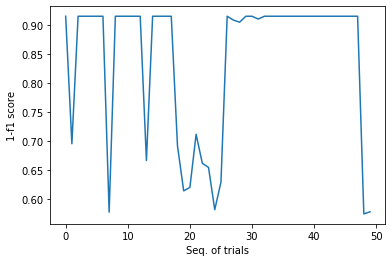

In [89]:
df_trial = study.trials_dataframe()
plt.xlabel('Seq. of trials')
plt.ylabel('1-f1 score')
plt.plot(df_trial.number, df_trial.value);

## Logistic Regression

In [90]:
study_name = 'Logistic Regression'

def objective(trial):
    max_iter = 2000
    C = trial.suggest_loguniform('C', 0.001, 100)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga', 'sag', 'newton-cg', 'lbfgs'])

    if solver == 'liblinear':
        penalty_lib = trial.suggest_categorical('penalty_lib', ['l1', 'l2'])
        clf = LogisticRegression(C=C, 
                         penalty=penalty_lib, 
                         solver=solver, 
                         random_state=33, 
                         max_iter=max_iter,
                         multi_class='auto')                   

    elif solver == 'saga':
        penalty_saga = trial.suggest_categorical('penalty_saga', ['elasticnet', 'l2'])
        if penalty_saga == 'elasticnet':
            l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
        clf = LogisticRegression(C=C, 
                         penalty=penalty_saga, 
                         solver=solver, 
                         random_state=33, 
                         max_iter=max_iter,
                         multi_class='auto',
                         l1_ratio=l1_ratio)                   

    elif solver in  ['sag', 'newton-cg', 'lbfgs']:
        penalty_rest = trial.suggest_categorical('penalty_rest', ['l2'])   
        clf = LogisticRegression(C=C, 
                         penalty=penalty_rest, 
                         solver=solver, 
                         random_state=33, 
                         max_iter=max_iter,
                         multi_class='auto')                   
        

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=100)

hyper_opt[study_name] = study.best_params
print(f"Best parameters. ", study.best_params)
print("Best result: ", 1-study.best_value)      


[W 2019-09-05 15:10:51,139] Setting status of trial#3 as TrialState.FAIL because of the following error: UnboundLocalError("local variable 'l1_ratio' referenced before assignment")
Traceback (most recent call last):
  File "C:\conda\lib\site-packages\optuna\study.py", line 437, in _run_trial
    result = func(trial)
  File "<ipython-input-90-68db42d38651>", line 27, in objective
    l1_ratio=l1_ratio)
UnboundLocalError: local variable 'l1_ratio' referenced before assignment
[W 2019-09-05 15:10:52,154] Setting status of trial#8 as TrialState.FAIL because of the following error: UnboundLocalError("local variable 'l1_ratio' referenced before assignment")
Traceback (most recent call last):
  File "C:\conda\lib\site-packages\optuna\study.py", line 437, in _run_trial
    result = func(trial)
  File "<ipython-input-90-68db42d38651>", line 27, in objective
    l1_ratio=l1_ratio)
UnboundLocalError: local variable 'l1_ratio' referenced before assignment
[W 2019-09-05 15:10:54,080] Setting status

UnboundLocalError: local variable 'l1_ratio' referenced before assignment
[W 2019-09-05 15:11:54,999] Setting status of trial#54 as TrialState.FAIL because of the following error: UnboundLocalError("local variable 'l1_ratio' referenced before assignment")
Traceback (most recent call last):
  File "C:\conda\lib\site-packages\optuna\study.py", line 437, in _run_trial
    result = func(trial)
  File "<ipython-input-90-68db42d38651>", line 27, in objective
    l1_ratio=l1_ratio)
UnboundLocalError: local variable 'l1_ratio' referenced before assignment
[W 2019-09-05 15:11:55,215] Setting status of trial#55 as TrialState.FAIL because of the following error: UnboundLocalError("local variable 'l1_ratio' referenced before assignment")
Traceback (most recent call last):
  File "C:\conda\lib\site-packages\optuna\study.py", line 437, in _run_trial
    result = func(trial)
  File "<ipython-input-90-68db42d38651>", line 27, in objective
    l1_ratio=l1_ratio)
UnboundLocalError: local variable 'l1_ra

Best parameters.  {'C': 98.04013417126228, 'solver': 'liblinear', 'penalty_lib': 'l1'}
Best result:  0.8471299093655588


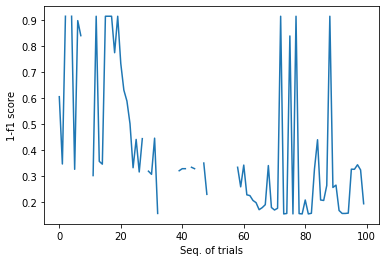

In [91]:
plot_trials(study.trials_dataframe())

## SGDClassifier as logistic regression

In [92]:
study_name = 'SGDClassifier logreg'
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])
    alpha = trial.suggest_loguniform('alpha', 0.00005, 0.1)
    average = trial.suggest_categorical('average', [True, False, 10, 50, 100])

    clf = SGDClassifier(loss='log', 
                  penalty='l2', 
                  average=average, 
                  max_iter=1000, 
                  tol=1e-3, 
                  alpha=alpha, 
                  fit_intercept=fit_intercept, 
                  early_stopping=True,
                  learning_rate=learning_rate,
                  eta0=0.001,
                  random_state=33)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=200)

hyper_opt['SGDClassifier_open'] = study.best_params
print("Best parameters: ", study.best_params) 
print("Best result: ", 1-study.best_value)      


Best parameters:  {'fit_intercept': False, 'learning_rate': 'invscaling', 'alpha': 0.015006663265329913, 'average': 50}
Best result:  0.6265861027190333


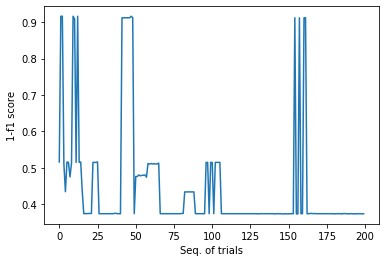

In [93]:
df_trial = study.trials_dataframe()
plt.xlabel('Seq. of trials')
plt.ylabel('1-f1 score')
plt.plot(df_trial.number, df_trial.value);

## SGDClassifier as linear svm

In [94]:
study_name = 'SGDClassifier svm'
def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])
    alpha = trial.suggest_loguniform('alpha', 0.00005, 0.1)
    average = trial.suggest_categorical('average', [True, False, 10, 50, 100])

    clf = SGDClassifier(loss='hinge', 
                  penalty='l2', 
                  average=average, 
                  max_iter=1000, 
                  tol=1e-3, 
                  alpha=alpha, 
                  fit_intercept=fit_intercept, 
                  early_stopping=True,
                  learning_rate=learning_rate,
                  eta0=0.001,
                  random_state=33)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=100)

hyper_opt['SGDClassifier_svm'] = study.best_params
print("Best parameters: ", study.best_params) 
print("Best result: ", 1-study.best_value)      

Best parameters:  {'fit_intercept': True, 'learning_rate': 'adaptive', 'alpha': 0.0026372085288757733, 'average': False}
Best result:  0.7444108761329306


## SGDClassifier other
any loss function but hinge (=linear svm) and log(=logistic regression)

In [95]:
study_name = 'SGDClassifier other'
def objective(trial):
    loss = trial.suggest_categorical('loss', ['modified_huber', 'squared_hinge', 'perceptron'])
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])
    alpha = trial.suggest_loguniform('alpha', 0.00005, 0.1)
    average = trial.suggest_categorical('average', [True, False, 10, 50, 100])

    clf = SGDClassifier(loss=loss, 
                  penalty='l2', 
                  average=average, 
                  max_iter=1000, 
                  tol=1e-3, 
                  alpha=alpha, 
                  fit_intercept=fit_intercept, 
                  early_stopping=True,
                  learning_rate=learning_rate,
                  eta0=0.001,
                  random_state=33)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=200)

hyper_opt['SGDClassifier_other'] = study.best_params
print("Best parameters: ", study.best_params) 
print("Best result: ", 1-study.best_value)      


Best parameters:  {'loss': 'perceptron', 'fit_intercept': False, 'learning_rate': 'adaptive', 'alpha': 0.09294100432592732, 'average': False}
Best result:  0.9226586102719033


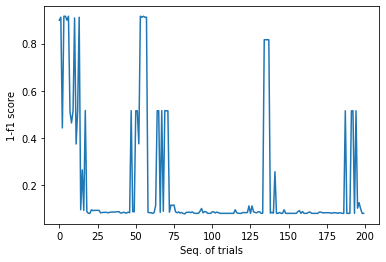

In [96]:
df_trial = study.trials_dataframe()
plt.xlabel('Seq. of trials')
plt.ylabel('1-f1 score')
plt.plot(df_trial.number, df_trial.value);

## Perceptron

In [97]:
study_name = 'Perceptron'
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 0.00005, 0.1)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])

    clf = Perceptron(penalty=penalty, 
                     alpha=alpha, 
                     max_iter=2000, 
                     early_stopping=True,
                     eta0=0.0001,
                     random_state=33)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=100)

hyper_opt['Perceptron'] = study.best_params
print("Best parameters: ", study.best_params) 
print("Best result: ", 1-study.best_value)      

Best parameters:  {'alpha': 0.0032764562737233353, 'penalty': None}
Best result:  0.1746223564954683


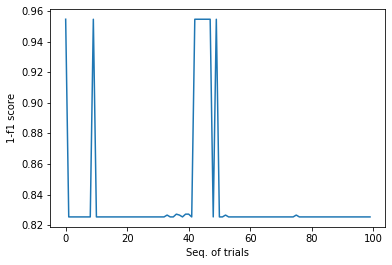

In [98]:
plot_trials(study.trials_dataframe())

## LightGBM

In [ ]:
study_name = 'LightGBM'
def objective(trial):
    num_leaves = trial.suggest_int('num_leaves', 10, 300 )
    min_child_samples = trial.suggest_int('min_child_samples', 10, 30)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.3 )
    #min_split_gain = 
    #num_iterations
    #feature_fraction
    #max_depth = trial.suggest_uniform('max_depth', )    
    #min_data_in_leaf

    
    clf = lgb.LGBMClassifier(num_leaves=num_leaves,
                             min_child_samples=min_child_samples,
                             learning_rate=learning_rate
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return 1.0-f1_score(y_test, y_pred, average='micro')  #1-f1 because optuna minimizes the objective

study = optuna.create_study(study_name=study_name)
study.optimize(objective, n_jobs=-1, n_trials=50)

hyper_opt['LightGBM'] = study.best_params
print("Best parameters: ", study.best_params) 
print("Best result: ", 1-study.best_value)      


## XGBoost

In [ ]:
study_name = 'XGBoost'

def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    param = {
        'silent': 1,
        'objective': 'multi:softmax',
        'num_class': 12,
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'tree_method': 'gpu_hist'
    }

    if param['booster'] == 'gbtree' or param['booster'] == 'dart':
        param['max_depth'] = trial.suggest_int('max_depth', 1, 9)
        param['eta'] = trial.suggest_loguniform('eta', 1e-8, 1.0)
        param['gamma'] = trial.suggest_loguniform('gamma', 1e-8, 1.0)
        param['grow_policy'] = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    if param['booster'] == 'dart':
        param['sample_type'] = trial.suggest_categorical('sample_type', ['uniform', 'weighted'])
        param['normalize_type'] = trial.suggest_categorical('normalize_type', ['tree', 'forest'])
        param['rate_drop'] = trial.suggest_loguniform('rate_drop', 1e-8, 1.0)
        param['skip_drop'] = trial.suggest_loguniform('skip_drop', 1e-8, 1.0)

    # Add a callback for pruning.
    #pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'validation-error')
    bst = xgb.train(param, dtrain)        #callbacks=[pruning_callback] \ evals=[(dtest, 'validation')]
    y_pred_raw = bst.predict(dtest)
    y_pred = np.rint(y_pred_raw)
    f1_micro = f1_score(y_test, y_pred, average='micro')
    return 1.0 - f1_micro


study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
study.optimize(objective, n_trials=5)
hyper_opt['XGBoost'] = study.best_params
print("Best parameters: ", study.best_params) 
print("Best result: ", 1-study.best_value)      

In [ ]:
with open('hyper_opt.json', 'w') as fout:
    json.dump(hyper_opt, fout)

# Crossvalidation

In [65]:
#initialize report file
results = Report(parameter={'samples': number_of_samples, 
                            'features': features, 
                            'stopwords': remove_stopwords})
#read optimized hyperparameter
with open('hyper_opt.json') as fin:
    hyper_opt = json.load(fin)

## Traditional approaches: Logistic regression and svm

In [97]:
# classifiers = {'ComplementNB':ComplementNB(), 'MultinomialNB':MultinomialNB()}
classifiers = {'LogisticRegression': LogisticRegression(C=hyper_opt['Logistic Regression']['C'], 
                                                        penalty='l2', 
                                                        multi_class='auto', 
                                                        solver=hyper_opt['Logistic Regression']['solver']), 
                'LinearSVC': LinearSVC(C=0.5, random_state=33),
                'SVM': SVC(kernel=hyper_opt['svm']['kernel'], 
                           C=hyper_opt['svm']['C'], 
                           random_state=33),
                'SGDClassifier (linear_svm)': SGDClassifier(loss='hinge', 
                                                            penalty='l2', 
                                                            average=hyper_opt['SGDClassifier_svm']['average'], 
                                                            max_iter=1000, 
                                                            learning_rate=hyper_opt['SGDClassifier_svm']['learning_rate'], 
                                                            alpha=hyper_opt['SGDClassifier_svm']['alpha'],  
                                                            fit_intercept=hyper_opt['SGDClassifier_svm']['fit_intercept'], 
                                                            random_state=33),
                'SGDClassifier (log_regress)': SGDClassifier(loss='log', 
                                                                 fit_intercept=False, 
                                                                 penalty='l2', 
                                                                 average=True, 
                                                                 max_iter=1000, 
                                                                 alpha=0.0003, 
                                                                 random_state=33),
                'SGDClassifier (other)': SGDClassifier(loss=hyper_opt['SGDClassifier_other']['loss'],  
                                                       fit_intercept=hyper_opt['SGDClassifier_other']['fit_intercept'], 
                                                       penalty='l2', 
                                                       average=hyper_opt['SGDClassifier_other']['average'], 
                                                       max_iter=1000, 
                                                       eta0=0.001,
                                                       alpha=hyper_opt['SGDClassifier_other']['alpha'], 
                                                       learning_rate=hyper_opt['SGDClassifier_other']['learning_rate'], 
                                                       random_state=33),
                'K-nearest neighbours': KNeighborsClassifier(),
                'Perceptron': Perceptron(alpha=hyper_opt['Perceptron']['alpha']),
                'Decision Tree': DecisionTreeClassifier(random_state=33),
                #'HistGradientBoosting': HistGradientBoostingClassifier(random_state=33),
                #'RandomForest': RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=33)
               }

In [67]:

for name, clf in classifiers.items():
    print('-------------------------------------')
    t0 = time.time()
    scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro', n_jobs=-1, verbose=0)
    runtime = round(time.time()-t0, 2)
    results[name] = report(name, 'F1 micro', scores, runtime)

-------------------------------------
LogisticRegression (6.53s): F1 micro 0.70 +/-0.02
-------------------------------------
LinearSVC (12.38s): F1 micro 0.69 +/-0.01
-------------------------------------
SVM (238.77s): F1 micro 0.50 +/-0.03
-------------------------------------
SGDClassifier (linear svm) (12.44s): F1 micro 0.69 +/-0.03
-------------------------------------
SGDClassifier (linear regress.) (8.19s): F1 micro 0.53 +/-0.02
-------------------------------------
SGDClassifier (other) (10.18s): F1 micro 0.92 +/-0.02
-------------------------------------
K-nearest neighbours (43.89s): F1 micro 0.88 +/-0.02
-------------------------------------
Perceptron (4.97s): F1 micro 0.26 +/-0.15
-------------------------------------
Decision Tree (19.83s): F1 micro 0.76 +/-0.02


## Recent approaches: XGBoost, LightGBM, Catboost 

### LightGBM

In [ ]:
name = 'LightGBM'
t0 = time.time()
clf = lgb.LGBMClassifier(num_leaves= hyper_opt['LightGBM']['num_leaves'],
                         min_child_samples=hyper_opt['LightGBM']['min_child_samples'],
                         learning_rate=hyper_opt['LightGBM']['learning_rate']
                        )
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro', n_jobs=-1, verbose=0 )
runtime = round(time.time()-t0, 2)
results[name] = report(name, 'F1 micro', scores, runtime)

In [ ]:
scores

### XGBoost 

In [ ]:
name = 'XGBoost'
t0 = time.time()
clf = xgb.XGBClassifier(booster=hyper_opt['XGBoost']['booster'],
                        alpha=hyper_opt['XGBoost']['alpha'],
                        max_depth=3, 
                        learning_rate=0.1, 
                        verbosity=0, 
                        tree_method='gpu_hist')
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_micro', verbose=0 )
runtime = round(time.time()-t0, 2)
results[name] = report(name, 'F1 micro', scores, runtime)

In [ ]:
results.report()
results.to_file()

### Catboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=33)

In [ ]:
model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=33,
    logging_level='Silent'
)

In [ ]:
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    #logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

In [ ]:
#cross validation
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

# Analysis of results 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=33)

In [ ]:
clf = SGDClassifier(loss='hinge', penalty='l2', 
                    average=True, 
                    max_iter=1000, tol=1e-3, 
                    alpha=0.0003, random_state=33)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
print(le.classes_)
le.transform(le.classes_)

In [ ]:
#accuracy_score(y_test, predict)
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [ ]:
df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=le.classes_, columns=le.classes_)

In [ ]:
plt.figure(figsize=(12, 10))
_ = sns.heatmap(df, cmap=sns.color_palette("Blues"), linewidths=0.1, annot=True,  fmt="d")

In [ ]:
#normalize values
df_norm = df.astype('float') / df.sum(axis=1)[:, np.newaxis] ##[:, np.newaxis] outputs a column vector

In [ ]:
plt.figure(figsize=(14,10))
plt.title('Normalized Confusion Matrix for SGDClassifier (log)', fontsize=16)
ax = sns.heatmap(df_norm, cmap=sns.color_palette("Blues"), 
                linewidths=0.4, annot=True)
_ = ax.set(xlabel='predicted genre', ylabel='true genre')
plt.savefig("normalized_heatmap_sgd.png")

In [ ]:
# calculate error 
error = np.ones(len(df_norm))-df_norm.to_numpy().diagonal()
nr_class_instances = df.sum(axis=1)

In [ ]:
ax = sns.scatterplot(nr_class_instances, error)
ax.set(xlabel='number of texts in genre', ylabel='error rate')

In [ ]:
from scipy.stats import pearsonr, spearmanr
corr_spear = spearmanr(nr_class_instances, error)
corr_pear = pearsonr(nr_class_instances, error)
print(f"Spearman correlation: {round(corr_spear[0], 2)}. p-value: {corr_spear[1]}" )
print(f"Pearson correlation: {round(corr_pear[0], 2)}. p-value: {corr_pear[1]}")


In [ ]:
# visualize class distribution of training/test data
genres = Counter(list(meta_sample.genre.values))
labels, values = zip(*genres.most_common())
indexes = np.arange(len(labels))
plt.figure(figsize=(12,8))
bar = plt.bar(indexes, values)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xticks(indexes, labels, rotation='vertical')
plt.savefig('genre_dist.png')

# Separating stricly between authors, series and publishers

In [6]:
#reading doc term matrix
dtm = pd.read_csv(dtm_file, sep="\t", index_col=0)
# function return a list of possible combination (of series, publisher, author) to avoid key errors
combinations = get_available_combinations() 

In [7]:
#initialize report file
results = Report(parameter={'samples': all, 
                            'features': features, 
                            'stopwords': remove_stopwords})
#read optimized hyperparameter
with open('hyper_opt.json') as fin:
    hyper_opt = json.load(fin)

In [11]:
classifiers = {'LogisticRegression': LogisticRegression(C=hyper_opt['Logistic Regression']['C'], 
                                                        penalty='l2', 
                                                        multi_class='auto', 
                                                        solver=hyper_opt['Logistic Regression']['solver']), 
                'LinearSVC': LinearSVC(C=0.5, random_state=33),
                'SVM': SVC(kernel=hyper_opt['svm']['kernel'], 
                           C=hyper_opt['svm']['C'], 
                           gamma='auto',
                           random_state=33),
                'SGDClassifier (linear_svm)': SGDClassifier(loss='hinge', 
                                                            penalty='l2', 
                                                            average=hyper_opt['SGDClassifier_svm']['average'], 
                                                            max_iter=1000, 
                                                            learning_rate=hyper_opt['SGDClassifier_svm']['learning_rate'], 
                                                            alpha=hyper_opt['SGDClassifier_svm']['alpha'],  
                                                            fit_intercept=hyper_opt['SGDClassifier_svm']['fit_intercept'], 
                                                            random_state=33),
                'SGDClassifier (log_regress)': SGDClassifier(loss='log', 
                                                                 fit_intercept=False, 
                                                                 penalty='l2', 
                                                                 average=True, 
                                                                 max_iter=1000, 
                                                                 alpha=0.0003, 
                                                                 random_state=33),
                'SGDClassifier (other)': SGDClassifier(loss=hyper_opt['SGDClassifier_other']['loss'],  
                                                       fit_intercept=hyper_opt['SGDClassifier_other']['fit_intercept'], 
                                                       penalty='l2', 
                                                       average=hyper_opt['SGDClassifier_other']['average'], 
                                                       max_iter=1000, 
                                                       eta0=0.001,
                                                       alpha=hyper_opt['SGDClassifier_other']['alpha'], 
                                                       learning_rate=hyper_opt['SGDClassifier_other']['learning_rate'], 
                                                       random_state=33),
                'K-nearest neighbours': KNeighborsClassifier(),
                'Perceptron': Perceptron(alpha=hyper_opt['Perceptron']['alpha']),
                'Decision Tree': DecisionTreeClassifier(random_state=33),
                #'HistGradientBoosting': HistGradientBoostingClassifier(random_state=33),
                #'RandomForest': RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=33)
               }

In [8]:
#using preset values for hyperparameter
classifiers = {'LogisticRegression': LogisticRegression(solver='lbfgs',
                                                        penalty='l2', 
                                                        multi_class='auto', 
                                                        ), 
                'LinearSVC': LinearSVC(random_state=33),
                'SVM': SVC(gamma='auto',
                           random_state=33),
                'SGDClassifier (linear_svm)': SGDClassifier(loss='hinge', 
                                                            penalty='l2', 
                                                            max_iter=1000, 
                                                            random_state=33),
                'SGDClassifier (log_regress)': SGDClassifier(loss='log', 
                                                                 fit_intercept=False, 
                                                                 penalty='l2', 
                                                                 average=True, 
                                                                 max_iter=1000, 
                                                                 alpha=0.0003, 
                                                                 random_state=33),
                'SGDClassifier (other)': SGDClassifier(loss='perceptron',  
                                                       penalty='l2', 
                                                       max_iter=1000, 
                                                       eta0=0.001,
                                                       random_state=33),
                'K-nearest neighbours': KNeighborsClassifier(),
                'Perceptron': Perceptron(),
                'Decision Tree': DecisionTreeClassifier(random_state=33),
                'RandomForest': RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=33),
                'lgbm': lgb.LGBMClassifier(),
                'xgb' : xgb.XGBClassifier(max_depth=3, 
                                          verbosity=0) 
               
               }

In [9]:
'''
using the utility function get_constrained_data(genre=genre, 
                                                case=case,
                                                sample_file="constrain_set.pkl", 
                                                df=dtm)

        input:
          genre: str
          Testgenre: z.b. Horror

          case: str
          Gibt den constraint an (author, series, publisher, strict, random)

          sample_file: str
          Pfad zur Datei constrain_set.pkl

          df: pandas.DataFrame
          DocumentTermMatrix

        output:
          analog zu sklearn.model_selection.train_test_split

'''


'\nusing the utility function get_constrained_data(genre=genre, \n                                                case=case,\n                                                sample_file="constrain_set.pkl", \n                                                df=dtm)\n\n        input:\n          genre: str\n          Testgenre: z.b. Horror\n\n          case: str\n          Gibt den constraint an (author, series, publisher, strict, random)\n\n          sample_file: str\n          Pfad zur Datei constrain_set.pkl\n\n          df: pandas.DataFrame\n          DocumentTermMatrix\n\n        output:\n          analog zu sklearn.model_selection.train_test_split\n\n'

In [10]:
for clf_name, classifier in classifiers.items():
    print('-------------------------------------')
    print(clf_name)    
    t0 = time.time()
    result = run_combinations(dtm, combinations, classifier, "constrain_set.pkl")
    runtime = round(time.time()-t0, 2)
    results[clf_name] = result
    

-------------------------------------
LogisticRegression
-------------------------------------
LinearSVC
-------------------------------------
SVM
-------------------------------------
SGDClassifier (linear_svm)
-------------------------------------
SGDClassifier (log_regress)
-------------------------------------
SGDClassifier (other)
-------------------------------------
K-nearest neighbours
-------------------------------------
Perceptron
-------------------------------------
Decision Tree
-------------------------------------
RandomForest
-------------------------------------
lgbm
-------------------------------------
xgb


In [11]:
classifier_s = []
genre_s = []
case_s = []
value_s = []
for clf in results.keys():
    data = results[clf]
    for d in data:
        classifier_s.append(clf)
        genre_s.append(d[0])
        case_s.append(d[1])
        value_s.append(d[2])

    
df = pd.DataFrame([classifier_s, genre_s, case_s, value_s]).T
df = df.rename(columns={0: "classifier", 1: "genre", 2: "case", 3: "result"})
df.head()

,classifier,genre,case,result
0,LogisticRegression,Abenteuer,random,0.858108
1,LogisticRegression,Abenteuer,author,0.840909
2,LogisticRegression,Adels,random,0.804469
3,LogisticRegression,Adels,author,0.835341
4,LogisticRegression,Adels,reihe,0.6875


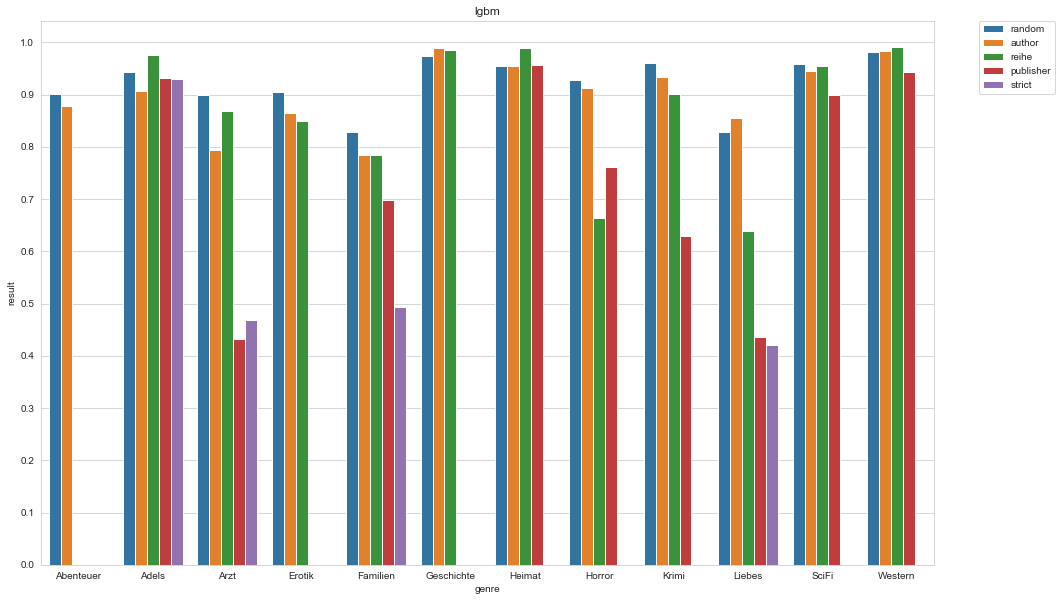

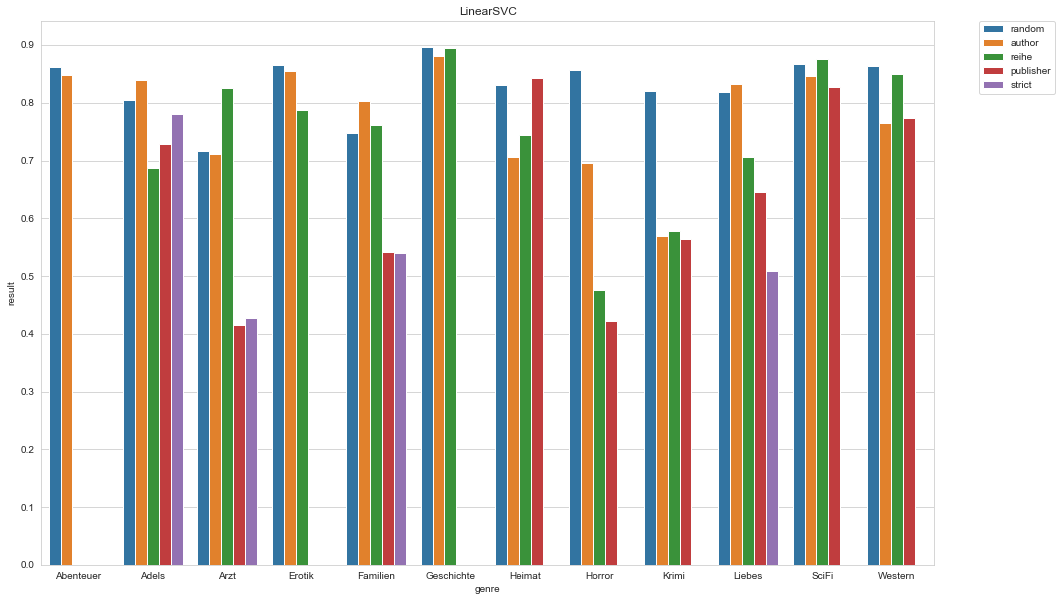

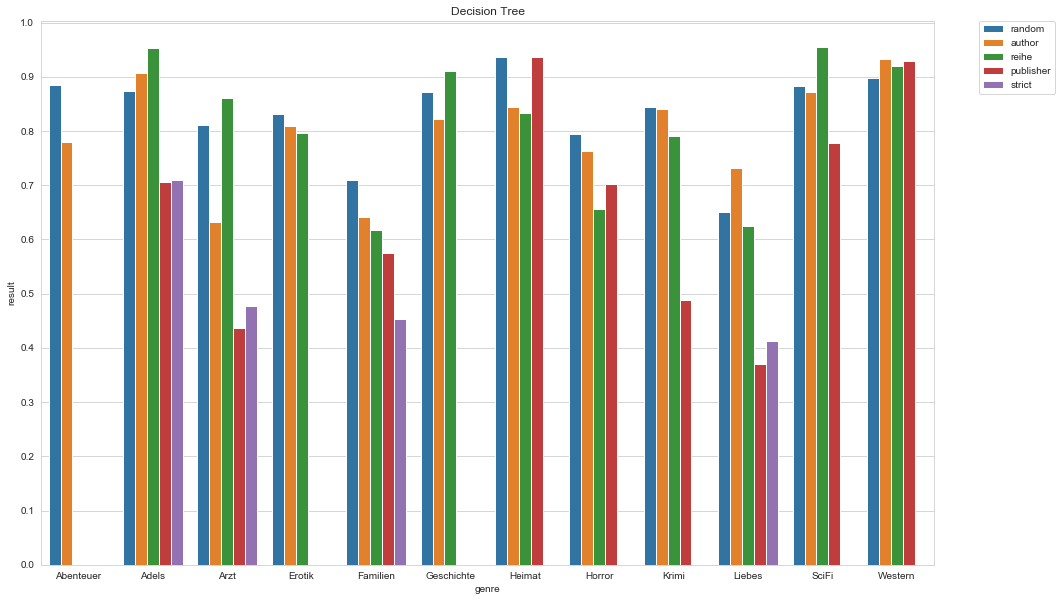

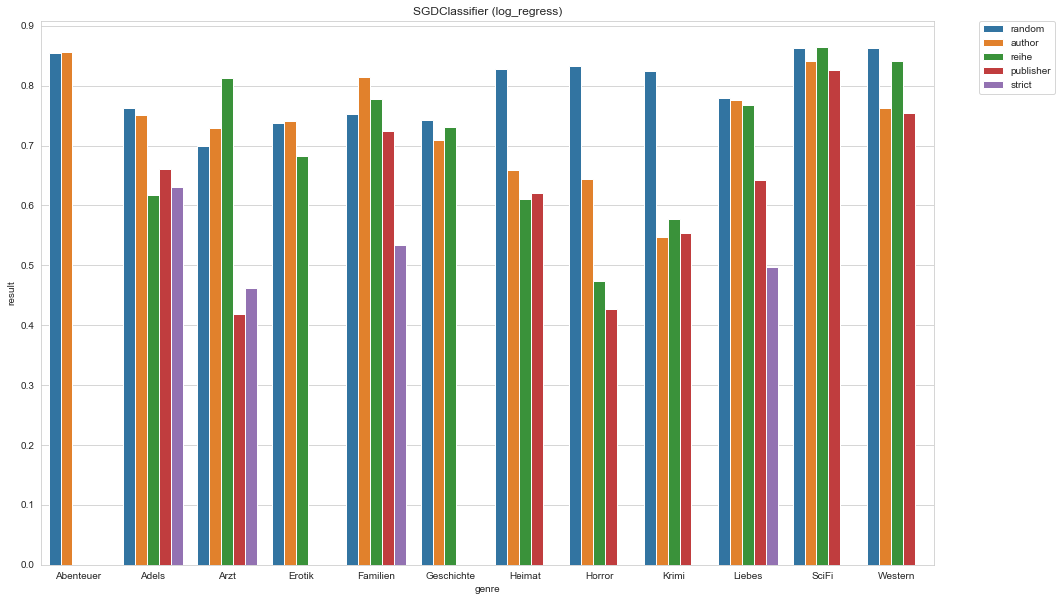

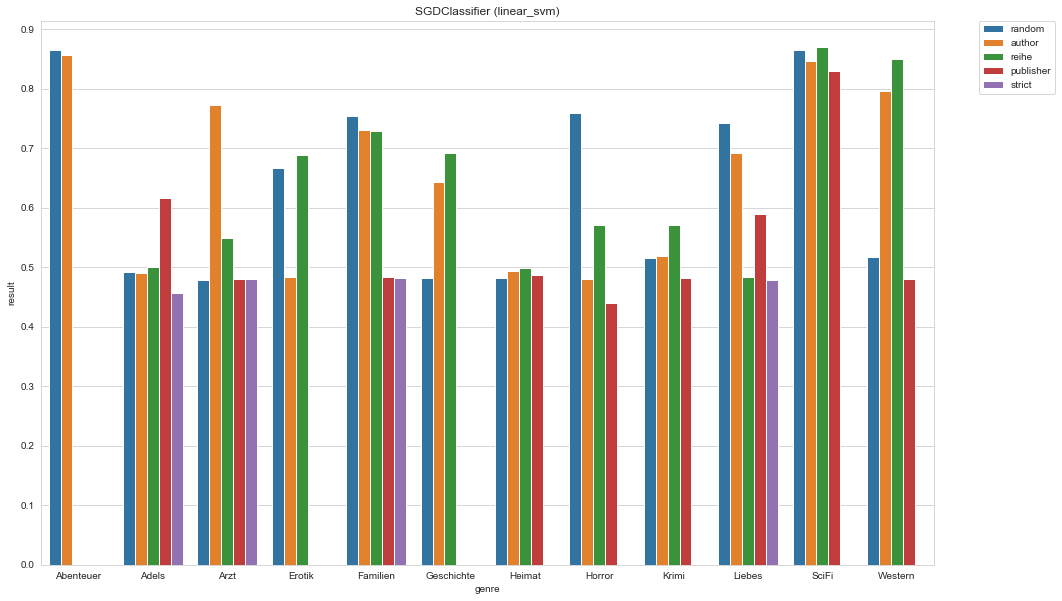

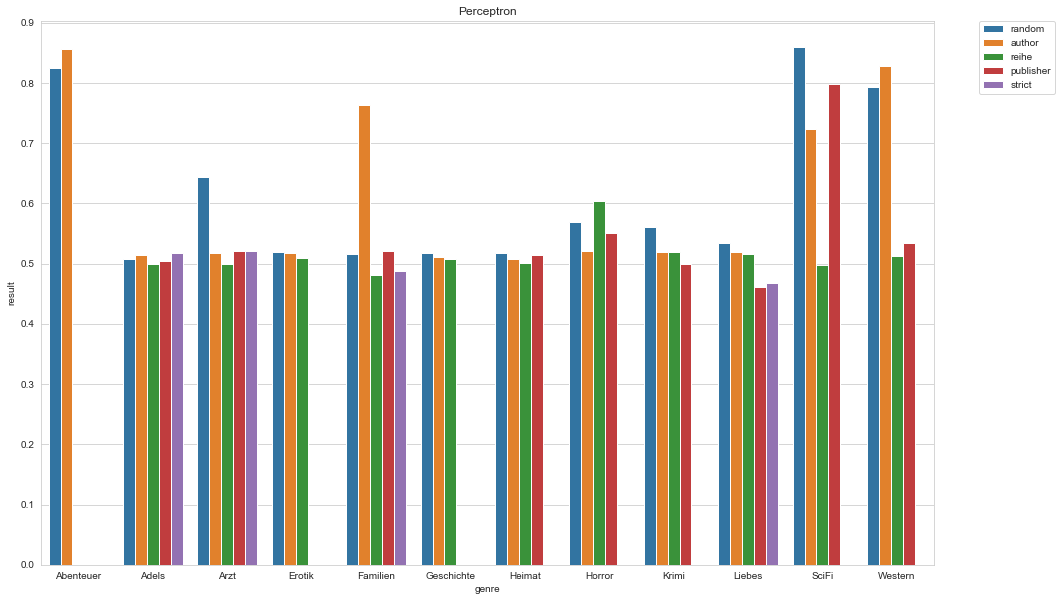

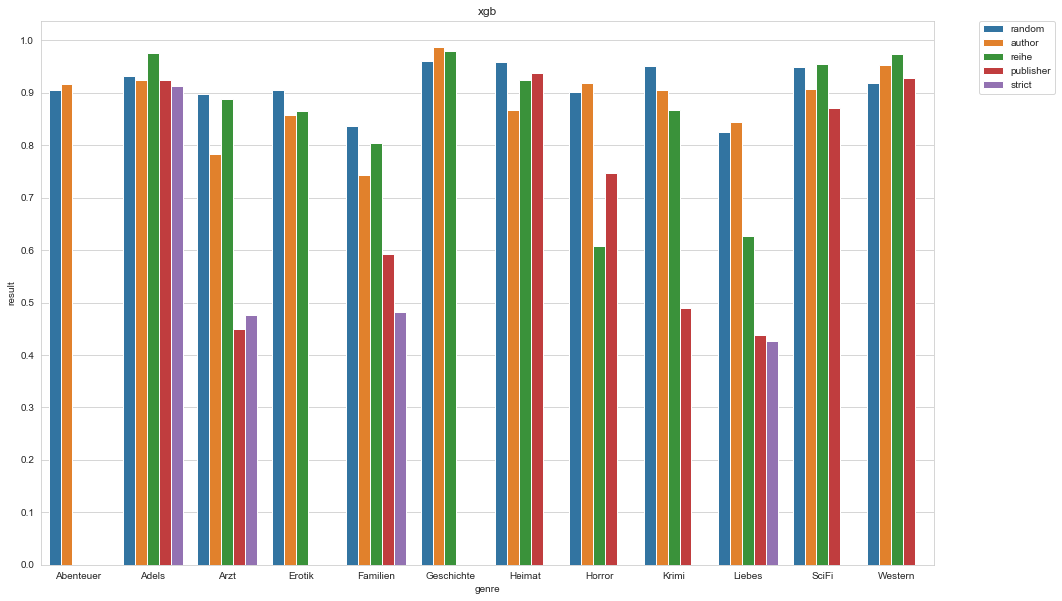

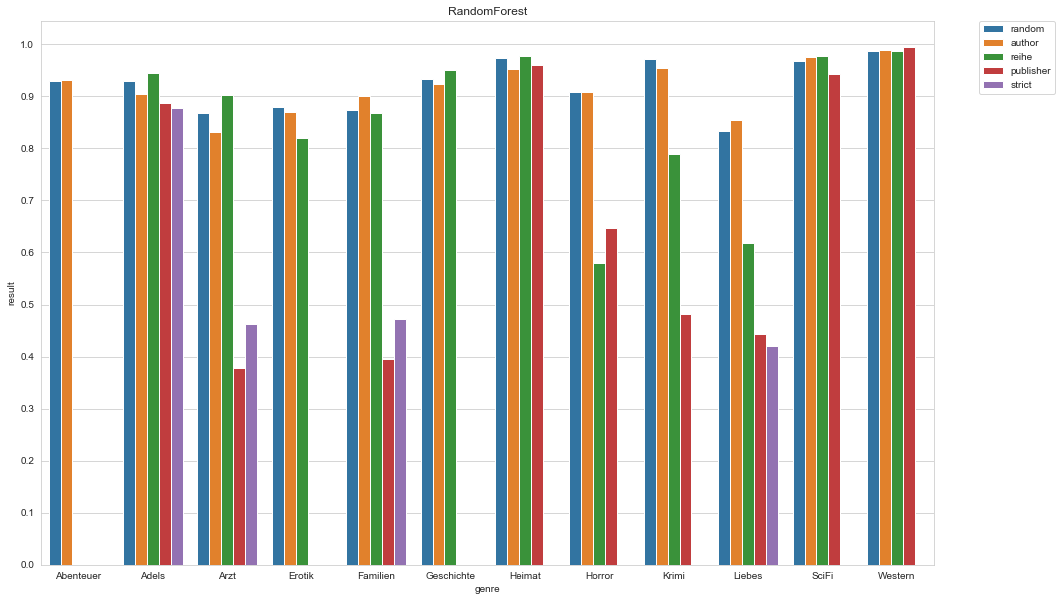

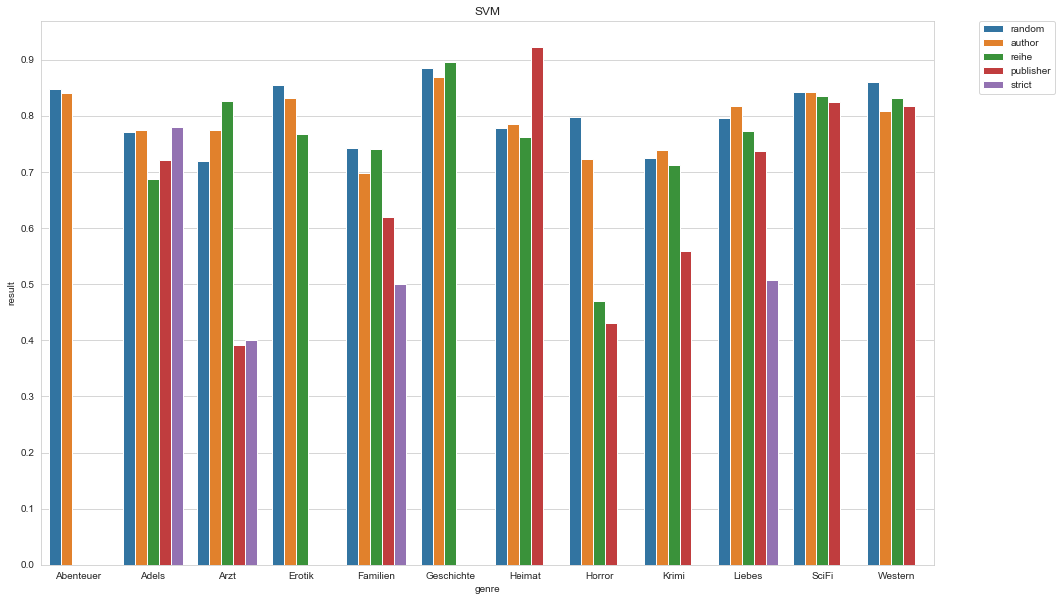

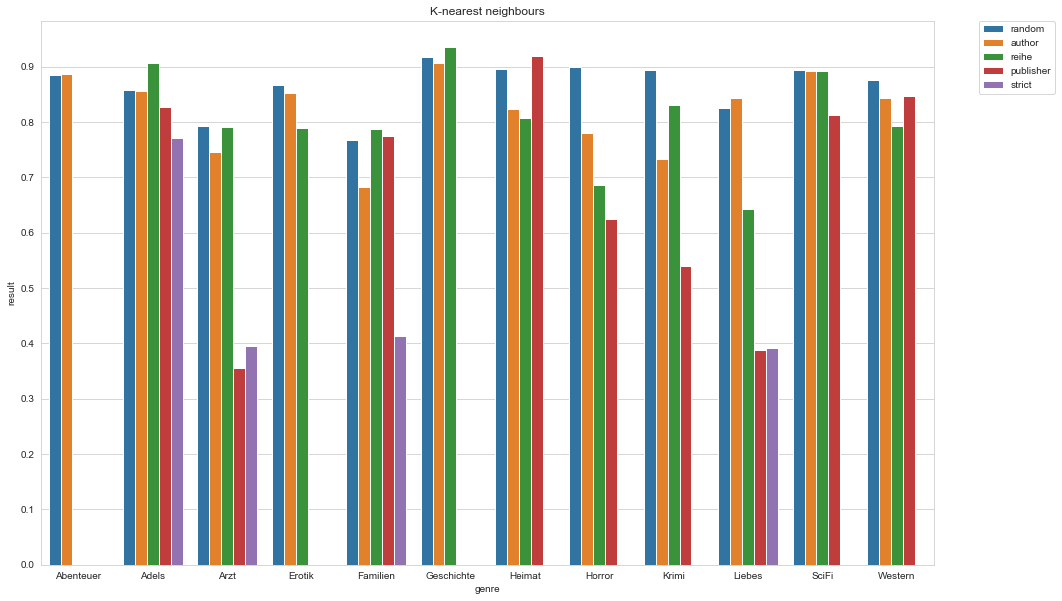

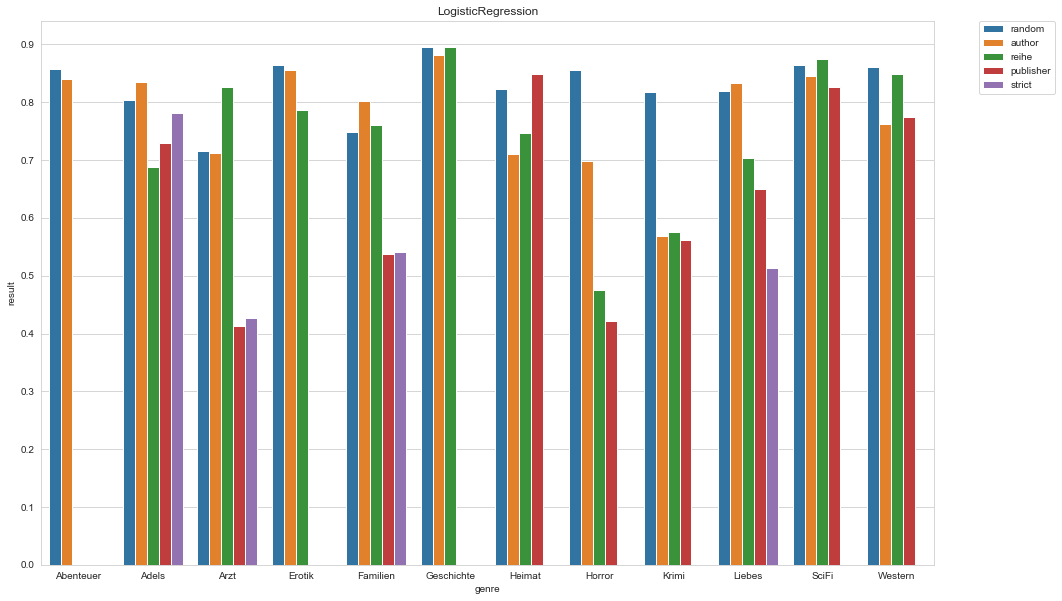

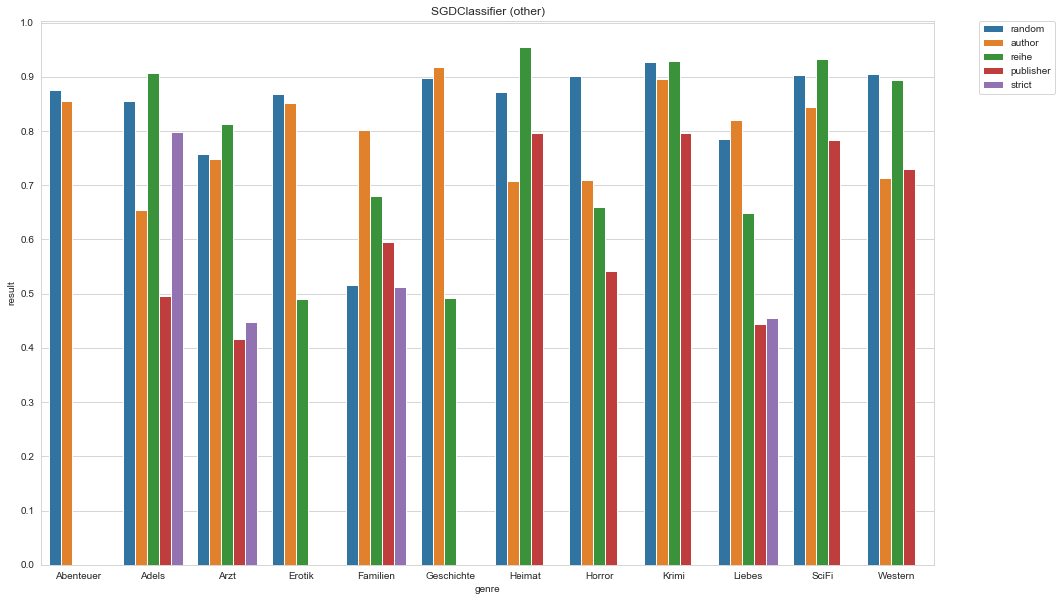

In [13]:
sns.set_style("whitegrid")
for clf in set(df.classifier):
    plt.figure(figsize=(16,10))
    plt.yticks(np.linspace(0,1,11))
    plt.title(clf)
    plt.grid(True)
    ax = sns.barplot(x="genre", y="result", hue="case", data=df[df.classifier==clf])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    plt.savefig("result_"+clf+'.png')